In [4]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
from PIL import Image
img = Image.open('C:/Users/Bipasha Roy/IMAGE PROCESSING/brain.tif')
def ShowImage(img):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

In [5]:
plt.show()

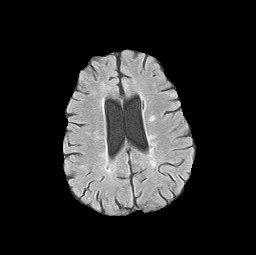

In [6]:
img

In [3]:
from PIL import Image
im = Image.open('C:/Users/Bipasha Roy/IMAGE PROCESSING/brain.tif')
im.save('test.jpeg')

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [14]:
image = cv2.imread('test.jpeg')
fd_hu_moments = fd_hu_moments(image)

In [15]:
fd_hu_moments

array([ 1.09607298e-03,  6.59076417e-08,  4.25938826e-11,  3.52934866e-12,
        4.32709367e-23,  9.02530628e-16, -4.06518053e-25])

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('brain.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [19]:
ret,thresh


(86.0, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [20]:
ret

86.0

In [21]:
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
from numpy import array
from scipy.misc import toimage
imm=toimage(thresh)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


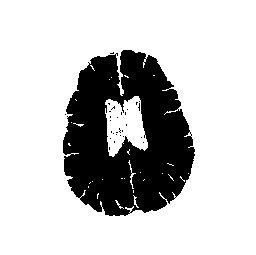

In [24]:
imm


In [27]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [29]:
sure_fg
imm=toimage(sure_fg)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


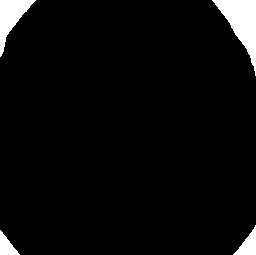

In [30]:
imm

In [32]:
unknown
imm=toimage(unknown)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


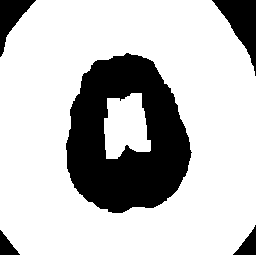

In [33]:
imm

In [34]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [35]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [36]:
markers

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  2,  2, ...,  3,  3, -1],
       [-1,  2,  2, ...,  3,  3, -1],
       ...,
       [-1,  5,  5, ...,  4,  4, -1],
       [-1,  5,  5, ...,  4,  4, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


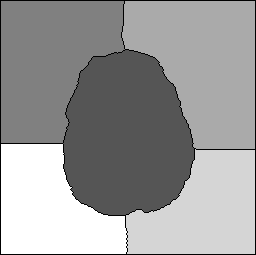

In [37]:
imm=toimage(markers)
imm

In [38]:
img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


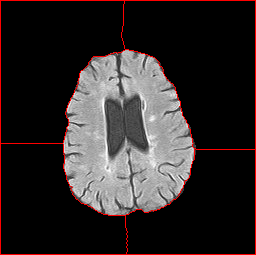

In [39]:
imm=toimage(img)
imm

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


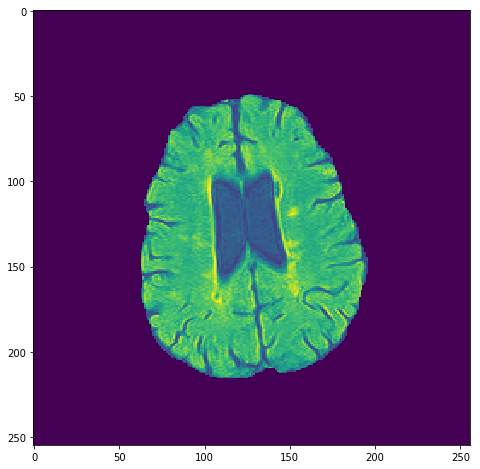

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
image = ndimage.imread("brain.tif")
plt.figure(figsize = (15,8))
imm=plt.imshow(image)

In [100]:
imm


In [108]:
kmeans_cluster = cluster.KMeans(n_clusters=255)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_


AttributeError: 'AxesImage' object has no attribute 'save'

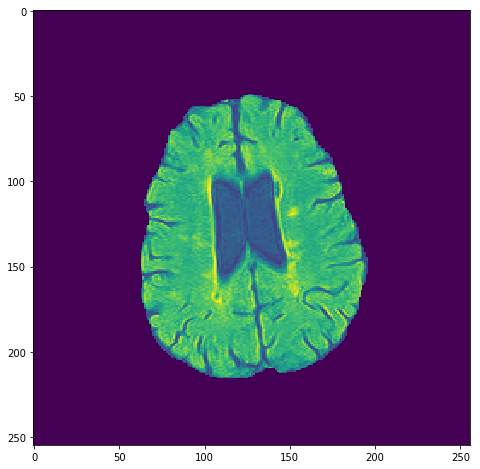

In [120]:
plt.figure(figsize = (15,8))
fig=plt.imshow(cluster_centers[cluster_labels].reshape(x, y))


In [121]:

file='brain.tif'
o1=process_image(file,0,type='rect')
cv2.imshow('original image',cv2.imread(file))

NameError: name 'process_image' is not defined